In order to further improve our model, it is time to add even more data to our model! 

In [1]:
import pandas as pd
from itertools import tee
import warnings
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from   sklearn.linear_model import LinearRegression
from   sklearn.model_selection import train_test_split


warnings.filterwarnings('ignore')

In [2]:
avg_income = pd.read_excel("..\\data\\washington_state_income_by_zipcode.xlsx", usecols = ["Zip Code", "Location", "City", "Population", "Avg. Income/H/hold", "National Rank"])
avg_income.drop(index = [100, 201, 302, 403, 504], inplace = True)

In [3]:
avg_income.rename(columns = {'Zip Code': 'zipcode'}, inplace = True)

In [4]:
avg_income.head(5)

,zipcode,Location,City,Population,Avg. Income/H/hold,National Rank
0,98039,"47.626035, -122.233707","Medina, Washington",3050,132665,#46
1,98053,"47.655058, -122.025817","Redmond, Washington",31203,96028,#335
2,98364,"47.855439, -122.595728","Port Gamble, Washington",102,94366,#364
3,98040,"47.562356, -122.226514","Mercer Island, Washington",22036,91904,#415
4,98029,"47.578444, -122.013924","Issaquah, Washington",28427,91146,#430


In [5]:
avg_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 0 to 566
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   zipcode             562 non-null    object
 1   Location            562 non-null    object
 2   City                562 non-null    object
 3   Population          562 non-null    object
 4   Avg. Income/H/hold  562 non-null    object
 5   National Rank       562 non-null    object
dtypes: object(6)
memory usage: 30.7+ KB


In [6]:
avg_income["zipcode"] = avg_income["zipcode"].astype("int")

In [7]:
['Population', "Avg. Income/H/hold", "National Rank"]

['Population', 'Avg. Income/H/hold', 'National Rank']

In [8]:
avg_income['Population'] = avg_income['Population'].astype('int')

In [9]:
avg_income['Avg. Income/H/hold'] =  avg_income['Avg. Income/H/hold'].astype('int')

In [10]:
import re
avg_income['National Rank'] = avg_income['National Rank'].apply(lambda x: int(re.sub(r'[^\w\s]', '', x)))

In [11]:
avg_income['Location'] = avg_income['Location'].apply(lambda x: x[:9] + ',' +  x[11:])

In [12]:
incomes = []

for income in avg_income["Location"]:
    incomes.append((float(income[:8]), float(income[11:])))
    
for income, index in zip(incomes, range(len(avg_income['Location']))):
        avg_income['Location'][index] = income 

In [13]:
type(avg_income.Location[0])

tuple

In [14]:
homes = pd.read_excel("..\\data\\king_county_home_sales.xlsx", index_col = "Unnamed: 0")


In [15]:
homes.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,...,sqft_lot15,renovated,view_ord,condition_ord,grade_ord,age,point,distance_to_starbucks_miles,distance_to_amazon_miles,distance_to_needle_miles
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,1180,...,5650,0,0,2,4,60,"(47.5112, -122.257)",6.041009,8.552873,8.697321
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,2170,...,7639,1,0,2,4,64,"(47.5112, -122.257)",6.041009,8.552873,8.697321


In [16]:
homes.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', 'view_ord', 'condition_ord', 'grade_ord',
       'age', 'point', 'distance_to_starbucks_miles',
       'distance_to_amazon_miles', 'distance_to_needle_miles'],
      dtype='object')

In [17]:
homes_and_income = homes.merge(avg_income, on = "zipcode")

In [18]:
homes_and_income.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', 'view_ord', 'condition_ord', 'grade_ord',
       'age', 'point', 'distance_to_starbucks_miles',
       'distance_to_amazon_miles', 'distance_to_needle_miles', 'Location',
       'City', 'Population', 'Avg. Income/H/hold', 'National Rank'],
      dtype='object')

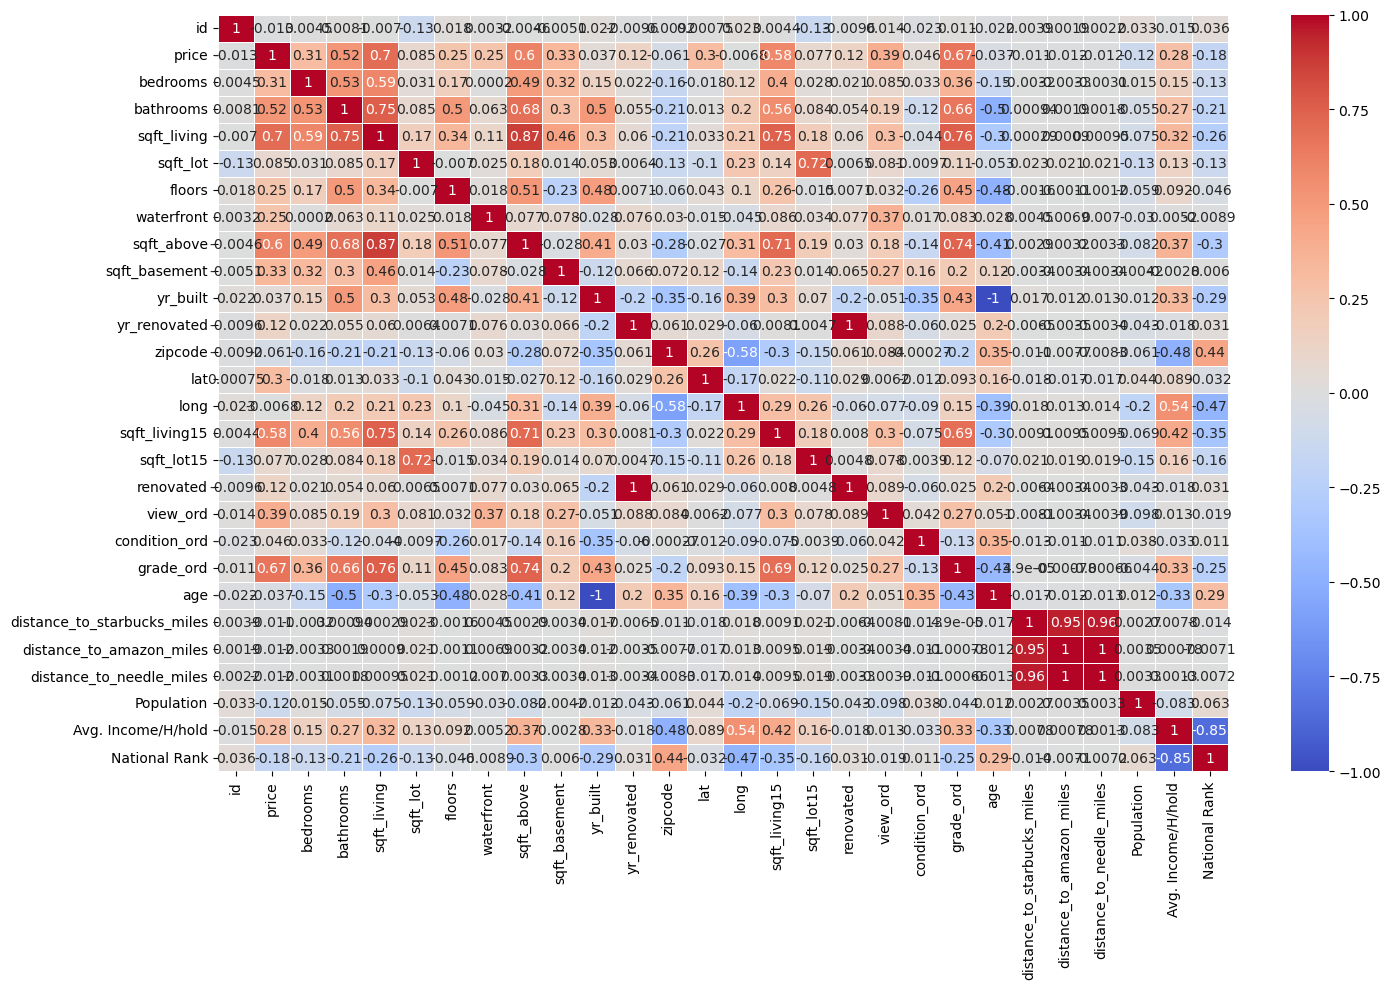

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(homes_and_income.corr(), center = 0, cmap = "coolwarm", annot=True, linewidths=.5, ax=ax)

plt.tight_layout()


In [20]:
dummy_zip = pd.get_dummies(homes_and_income['zipcode'], drop_first = True)

In [21]:
features = homes_and_income[['bedrooms', 'bathrooms', 'sqft_living',
                 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'lat', 'long',
                 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'view_ord', 'condition_ord', 'grade_ord', 
                 'age', "renovated", "distance_to_amazon_miles", 'Population', 'Avg. Income/H/hold', 'National Rank']]

In [22]:
features = features.join(dummy_zip)

In [23]:
X, y = features, homes_and_income[['price']]

# Generate train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42
)


# Init, fit, score
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

print(f"Training score: {multi_model.score(X_train, y_train)}")
multi_model_score = multi_model.score(X_test, y_test)
print(f"Test score: {multi_model.score(X_test, y_test)}")

Training score: 0.8034708611768964
Test score: 0.8098226817203398


In [24]:
def correlated_column_names(df, target, threshold):
    # this function returns the a list of the names of columns with greater than a certain threshold of correlation. 
    index_columns = df.corr()[target][(df.corr()[target] >= threshold) & (df.corr()[target] != 1) ].index # this gets an index object
    columns = [index for index in index_columns] # this creates a list with column names 
    return(columns)


features = homes_and_income[correlated_column_names(homes_and_income, 'price', .1 )]
features.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'sqft_living15',
       'renovated', 'view_ord', 'grade_ord', 'Avg. Income/H/hold'],
      dtype='object')

In [25]:
features = features.join(dummy_zip)

In [26]:
X, y = features, homes_and_income[['price']]

# Generate train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42
)


# Init, fit, score
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

print(f"Training score: {multi_model.score(X_train, y_train)}")
multi_model_score = multi_model.score(X_test, y_test)
print(f"Test score: {multi_model.score(X_test, y_test)}")

Training score: 0.7996814534053419
Test score: 0.8045094741527161


# Now its time to do the dependencies of our new dataset

In [27]:
y = homes_and_income['price']
X = homes_and_income[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'sqft_living15',
       'renovated', 'view_ord', 'grade_ord', 'Avg. Income/H/hold']]

from sklearn.preprocessing import PolynomialFeatures

linear_with_interaction = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

X_transformed = linear_with_interaction.fit_transform(X)

feat_names = pd.Series(linear_with_interaction.get_feature_names())

feat_names

0           x0
1           x1
2           x2
3           x3
4           x4
        ...   
100    x10 x12
101    x10 x13
102    x11 x12
103    x11 x13
104    x12 x13
Length: 105, dtype: object

In [28]:
xs = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',  'x11', 'x12', 'x13']

columns = X.columns

map_dict = {x:y for x,y in zip(xs, columns)}

for key, value in map_dict.items():
    feat_names = feat_names.str.replace(key, value)


income_trans = pd.DataFrame(X_transformed)

income_trans.columns = feat_names

income_trans = income_trans.join(dummy_zip)

In [29]:
# Generate train/test sets

X_train, X_test, y_train, y_test = train_test_split(
    income_trans, y, test_size=.3, random_state=42
)


# Init, fit, score
interactions_model = LinearRegression()
interactions_model.fit(X_train, y_train)

print(f"Training score: {interactions_model.score(X_train, y_train)}")

print(f"Testing score: {interactions_model.score(X_test, y_test)}")

interactions_model_score  = interactions_model.score(X_test, y_test)

Training score: 0.875982877386055
Testing score: 0.837732639311036


# Now its time to visualize our beautiful result! 

In [30]:
#conda install plotly

In [32]:
import plotly.express as px
import plotly.graph_objects as go



x_range = np.linspace(income_trans.min(), X.max(), 100)
y_range = interactions_model.predict(x_range.reshape(-1, 1))


fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction')
])
fig.show()

ValueError: operands could not be broadcast together with shapes (14,) (170,) 